In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sea
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [2]:
train=pd.read_csv("C:\\Users\\Avirup\\Documents\\Python_datasets\\train_HR_Analytics.csv")
test=pd.read_csv("C:\\Users\\Avirup\\Documents\\Python_datasets\\test_HR_Analytics.csv")
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0


In [3]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [5]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

### Analysis of Two Features containing Missing Values - education  &  previous_year_rating 

### Education

In [6]:
train['education'].unique()

array(["Master's & above", "Bachelor's", nan, 'Below Secondary'],
      dtype=object)

<AxesSubplot:>

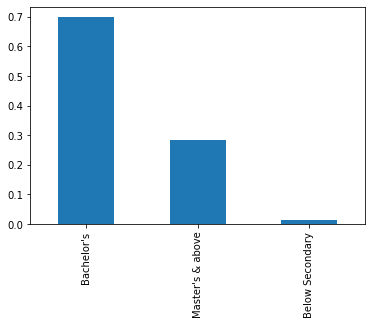

In [7]:
train['education'].value_counts(normalize=True).plot.bar()

In [8]:
Edu1=pd.crosstab(train['education'],train['is_promoted'], margins=True)
Edu1

is_promoted,0,1,All
education,,,
Bachelor's,33661,3008,36669
Below Secondary,738,67,805
Master's & above,13454,1471,14925
All,47853,4546,52399


In [9]:
train['education'].value_counts(normalize=True)

Bachelor's          0.699803
Master's & above    0.284834
Below Secondary     0.015363
Name: education, dtype: float64

In [10]:
train['education'].fillna(train['education'].mode()[0],inplace=True)
test['education'].fillna(test['education'].mode()[0],inplace=True)

In [11]:
train['education'].value_counts(normalize=True)

Bachelor's          0.712998
Master's & above    0.272314
Below Secondary     0.014688
Name: education, dtype: float64

In [12]:
Edu2=pd.crosstab(train['education'],train['is_promoted'], margins=True)
Edu2

is_promoted,0,1,All
education,,,
Bachelor's,35948,3130,39078
Below Secondary,738,67,805
Master's & above,13454,1471,14925
All,50140,4668,54808


The above shows difference in count in case of Bachelor's , since the Missing values were implemented with Bachelor's.

### Previous Year Rating

In [13]:
train['previous_year_rating'].unique()

array([ 5.,  3.,  1.,  4., nan,  2.])

In [14]:
train['previous_year_rating'].value_counts(normalize=True)

3.0    0.367335
5.0    0.231651
4.0    0.194874
1.0    0.122780
2.0    0.083360
Name: previous_year_rating, dtype: float64

In [15]:
train['previous_year_rating'].fillna(train['previous_year_rating'].mode()[0],inplace=True)
test['previous_year_rating'].fillna(test['previous_year_rating'].mode()[0],inplace=True)

In [16]:
train['previous_year_rating'].value_counts(normalize=True)

3.0    0.414939
5.0    0.214221
4.0    0.180211
1.0    0.113542
2.0    0.077087
Name: previous_year_rating, dtype: float64

### Analysis of other features

In [17]:
Dept=pd.crosstab(train['department'],train['is_promoted'], margins=True)
Dept

is_promoted,0,1,All
department,,,
Analytics,4840,512,5352
Finance,2330,206,2536
HR,2282,136,2418
Legal,986,53,1039
Operations,10325,1023,11348
Procurement,6450,688,7138
R&D,930,69,999
Sales & Marketing,15627,1213,16840
Technology,6370,768,7138


<AxesSubplot:xlabel='department'>

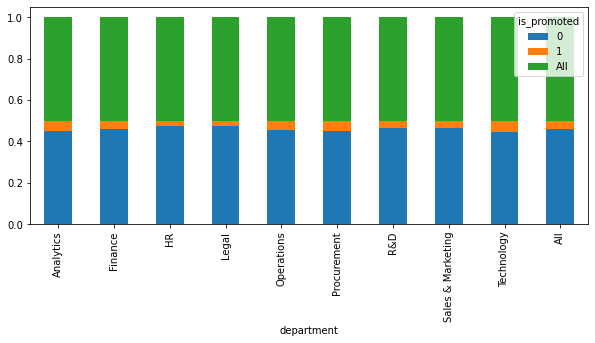

In [18]:
Dept.div(Dept.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(10,4))

In [19]:
train['region'].unique()

array(['region_7', 'region_22', 'region_19', 'region_23', 'region_26',
       'region_2', 'region_20', 'region_34', 'region_1', 'region_4',
       'region_29', 'region_31', 'region_15', 'region_14', 'region_11',
       'region_5', 'region_28', 'region_17', 'region_13', 'region_16',
       'region_25', 'region_10', 'region_27', 'region_30', 'region_12',
       'region_21', 'region_8', 'region_32', 'region_6', 'region_33',
       'region_24', 'region_3', 'region_9', 'region_18'], dtype=object)

### Ordering the region feature

In [20]:
train['region']=train['region'].str.replace('region_','').astype(float)
test['region']=test['region'].str.replace('region_','').astype(float)
train['region'].head()

0     7.0
1    22.0
2    19.0
3    23.0
4    26.0
Name: region, dtype: float64

C:\Users\Avirup\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


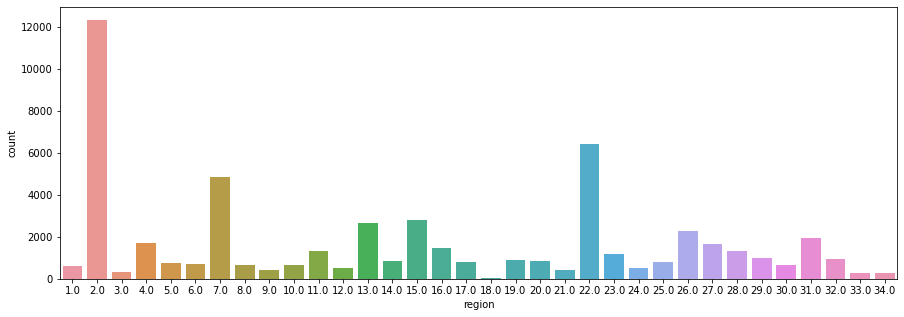

In [21]:
plt.figure(figsize=(15,5))
sea.countplot(train['region'])
plt.show()

In [22]:
bins=[0,7,14,21,28,34]
group=[1,2,3,4,5]
train['region']=pd.cut(train['region'],bins,labels=group)
test['region']=pd.cut(test['region'],bins,labels=group)

### Grouping Age feature

In [23]:
#bins=[20,30,40,50,60]
#group=[1,2,3,4]
#train['age']=pd.cut(train['age'],bins,labels=group)
#test['age']=pd.cut(test['age'],bins,labels=group)

In [24]:
#train['age'].value_counts(ascending=True,normalize=True)

In [25]:
#train=train.astype({'age':'float32','region':'float32','previous_year_rating':'float32'})
#test=test.astype({'age':'float32','region':'float32','previous_year_rating':'float32'})

### Converting string values into numerical values

In [26]:
train['gender']=train['gender'].map({'m':0,'f':1})
train['recruitment_channel']=train['recruitment_channel'].map({'sourcing':1,'referred':2,'other':3})
train['education']=train['education'].map({'Below Secondary':1,"Bachelor's":2,"Master's & above":3})
train['department']=train['department'].map({'Sales & Marketing':1,'Operations':2,'Technology':3,'Analytics':4,
       'R&D':5,'Procurement':6,'Finance':7,'HR':8,'Legal':9})

In [27]:
test['gender']=test['gender'].map({'m':0,'f':1})
test['recruitment_channel']=test['recruitment_channel'].map({'sourcing':1,'referred':2,'other':3})
test['education']=test['education'].map({'Below Secondary':1,"Bachelor's":2,"Master's & above":3})
test['department']=test['department'].map({'Sales & Marketing':1,'Operations':2,'Technology':3,'Analytics':4,
       'R&D':5,'Procurement':6,'Finance':7,'HR':8,'Legal':9})

In [28]:
train.head()

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,1,1,3,1,1,1,35,5.0,8,1,0,49,0
1,65141,2,4,2,0,3,1,30,5.0,4,0,0,60,0
2,7513,1,3,2,0,1,1,34,3.0,7,0,0,50,0
3,2542,1,4,2,0,3,2,39,1.0,10,0,0,50,0
4,48945,3,4,2,0,3,1,45,3.0,2,0,0,73,0


<AxesSubplot:>

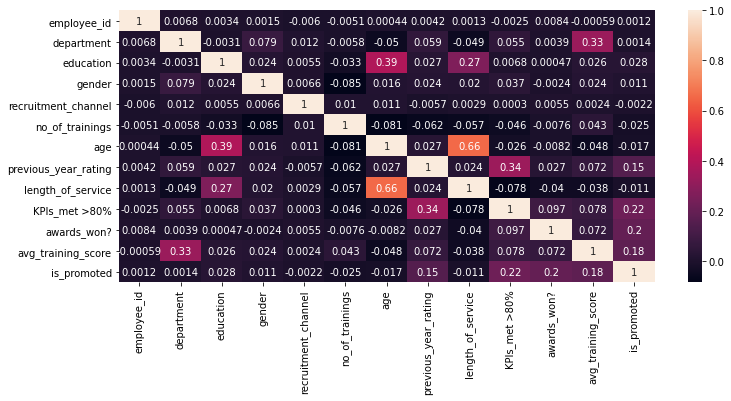

In [29]:
correlation=train.corr()
plt.figure(figsize=(12,5))
sea.heatmap(correlation,annot=True)

### Model creation

In [30]:
X=train.drop(['is_promoted'],axis=1)
Y=train['is_promoted']

#### Dividing train dataset into Train and Validation

In [31]:
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,test_size=0.2)

In [32]:
model=RandomForestClassifier(n_estimators=100)
model.fit(X_train, Y_train)

RandomForestClassifier()

In [33]:
pred_rf=model.predict(X_val)
accuracy_score(Y_val,pred_rf)

0.936325488049626

In [34]:
confusion_matrix(Y_val,pred_rf)

array([[10015,    32],
       [  666,   249]], dtype=int64)

In [35]:
pred_test=model.predict(test)

In [36]:
submission=pd.read_csv("C:\\Users\\Avirup\\Documents\\Python_datasets\\sample_submission_M0L0uXE.csv")
submission.set_index('employee_id',inplace=True)
submission['is_promoted']=pred_test

In [37]:
pd.DataFrame(submission).to_csv('HR_Prediction.csv')